In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


## 1.Loading data

In [3]:
data = pd.read_csv('Datasets/gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## 2.Data analysis

In [5]:
data.shape

(15039, 11)

In [6]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## 4.Data preprocessing
### 4.1. Seperating X,y

In [8]:
X = data.drop(labels='TEY',axis=1)
y = data['TEY']

In [9]:
col = X.columns


In [10]:
from sklearn.preprocessing import StandardScaler

### 4.2 Standardizing X

In [11]:
std = StandardScaler()
X = pd.DataFrame(std.fit_transform(X),columns=col)

In [12]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


### 4.3 Train test split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=45,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 10), (3008, 10), (12031,), (3008,))

## 5.ANN Model

In [17]:
import tensorflow as tf
import keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# create ANN model
model = Sequential()

## Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units = 5,input_dim = 10,kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units = 5,kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [24]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
602/602 [==============================] - 1s 599us/step - loss: 14309.8467
Epoch 2/50
602/602 [==============================] - 0s 584us/step - loss: 1858.1028
Epoch 3/50
602/602 [==============================] - 0s 588us/step - loss: 313.5623
Epoch 4/50
602/602 [==============================] - 0s 584us/step - loss: 229.7184
Epoch 5/50
602/602 [==============================] - 0s 609us/step - loss: 162.7896
Epoch 6/50
602/602 [==============================] - 0s 608us/step - loss: 109.7943
Epoch 7/50
602/602 [==============================] - 0s 598us/step - loss: 76.0502
Epoch 8/50
602/602 [==============================] - 0s 596us/step - loss: 54.6550
Epoch 9/50
602/602 [==============================] - 0s 596us/step - loss: 40.6072
Epoch 10/50
602/602 [==============================] - 0s 625us/step - loss: 31.8441
Epoch 11/50
602/602 [==============================] - 0s 617us/step - loss: 24.9905
Epoch 12/50
602/602 [==============================] - 0s 601us/s

## Model Prediction

In [43]:
model.predict(X_test)

4264     0.442857
3852     0.723292
1266     1.193433
14730    0.951146
487     -0.916625
           ...   
3715    -0.851801
7934     0.490787
10636    0.390284
10853    0.333434
591      0.764832
Name: TEY, Length: 3008, dtype: float64

## Hyper parameter Tuning of ANN
### Finding best set of parameters using manual grid search

In [44]:

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test - np.reshape(model.predict(X_test),(3008,)))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData =  FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 98.84409855657084
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 99.54591419596794
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 99.60026407124575
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.53331749565254
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 95.83101076937577
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 99.1481158460923
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 99.5742314523502
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 99.59818524638042
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 94.90685479568724
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 99.2400269591172
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 99.60616807633129
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 99.5823014946683
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 92.81312013120575
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 97.70810799700331
15 Parameters: batch_siz

## Plotting the parameter trial results

<AxesSubplot:xlabel='Parameters'>

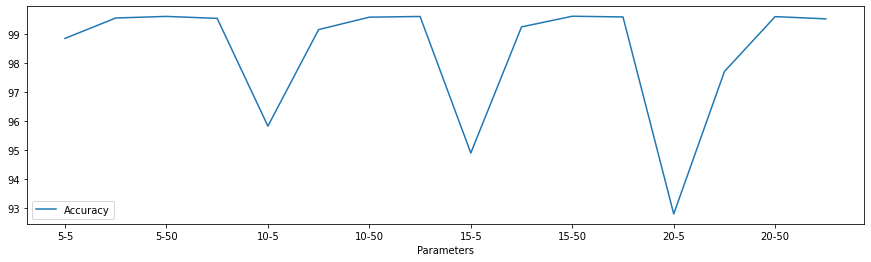

In [45]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Training the ANN model with the best parameters batch_size: 5 - epochs: 10

In [47]:
model.fit(x=X_train,y=y_train,batch_size=5,epochs=10,verbose=1)


Epoch 1/10
2407/2407 [==============================] - 1s 613us/step - loss: 0.6795
Epoch 2/10
2407/2407 [==============================] - 1s 583us/step - loss: 0.6474
Epoch 3/10
2407/2407 [==============================] - 1s 582us/step - loss: 0.6514
Epoch 4/10
2407/2407 [==============================] - 1s 575us/step - loss: 0.6576
Epoch 5/10
2407/2407 [==============================] - 1s 574us/step - loss: 0.6506
Epoch 6/10
2407/2407 [==============================] - 1s 596us/step - loss: 0.6572
Epoch 7/10
2407/2407 [==============================] - 2s 639us/step - loss: 0.6435
Epoch 8/10
2407/2407 [==============================] - 1s 575us/step - loss: 0.6448
Epoch 9/10
2407/2407 [==============================] - 1s 572us/step - loss: 0.6499
Epoch 10/10
2407/2407 [==============================] - 1s 579us/step - loss: 0.6531


In [52]:

# Generating Predictions on testing data
Predictions=model.predict(X_test)


TestingData=pd.DataFrame(data=y_test)
TestingData['PredictedPrice']=Predictions
TestingData.head()

,TEY,PredictedPrice
4264,110.78,110.521698
3852,133.74,133.408188
1266,110.62,109.977730
14730,134.73,134.275726
487,133.64,134.848877


In [54]:

# Computing the absolute percent error
APE=100*(abs(TestingData['TEY']-TestingData['PredictedPrice'])/TestingData['TEY'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 99.60111439207014


,TEY,PredictedPrice,APE
4264,110.78,110.521698,0.233167
3852,133.74,133.408188,0.248102
1266,110.62,109.977730,0.580609
14730,134.73,134.275726,0.337173
487,133.64,134.848877,0.904577
